In [12]:
import pandas as pd
import numpy as np
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import text 
import re

In [ ]:
def add_newline(text):
    text = text.replace("Ms. ", "")
    text = text.replace("Mrs. ", "")
    text = text.replace("Mr. ", "")
    text = unicode(text, 'utf-8')
    text = text.encode('ascii', 'ignore')

    def Sentences(text):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(text)
        return sentenceList
    
    content = Sentences(text)[:2]
    new = "<br>".join(content)
    new = re.sub('<br> ', '<br>', new)
    
    return new

In [21]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
topics_keyterms = pd.read_csv('topics_keyterms.csv')

In [3]:
topics = topics_keyterms.transpose()

In [4]:
topics.columns = topics.ix[0]

In [5]:
topics = topics.ix[1:]

In [6]:
hilary_com_count = pd.read_csv('data/hilary_com_count.csv')
x = topics[['hilary_pos', 'hilary_neg']].reset_index()
hilary_topics = pd.concat([x, hilary_com_count], axis = 1)
hilary_topics.head()
hilary_topics.drop('Unnamed: 0', axis =1, inplace=True)
hilary_topics['pos_percent'] = hilary_topics['Pos_num']/hilary_topics['Pos_num'].sum()
hilary_topics['pos_percent']
hilary_topics['neg_percent'] = hilary_topics['Neg_num']/hilary_topics['Neg_num'].sum()
hilary_topics['neg_percent']

hilary_topics['hilary_pos_ex1'] = hilary_topics['hilary_pos_ex'].apply(lambda x: add_newline(x))
hilary_topics['hilary_neg_ex1'] = hilary_topics['hilary_neg_ex'].apply(lambda x: add_newline(x))
hilary_topics.to_csv('data/hilary_topics.csv')

In [72]:
print hilary_topics['hilary_pos'].values
print hilary_topics['hilary_neg'].values

[ 'win election democratic nomination party general vote democrats think clinton'
 'email server private state information classified government emails use secretary'
 'president hillary woman america rodham united states qualified ms clinton'
 'mrs mr clinton republican good party obama position wehner republicans'
 'biden joe run president clinton better race presidency vp man'
 'times story coverage nyt news ny reporting page clinton readers'
 'trump republican bush donald gop clinton hillary candidates like fiorina'
 'hilary bernie win joe hiding like run left wow better'
 'sanders bernie hillary support clinton media candidate campaign socialist need'
 'change people just black don like blm lives want know']
['biden joe run president obama democrats hilary clinton warren vice'
 'classified server email information state emails private secretary clinton department'
 'clintons bushes sick tired barry vote obamas white democrat gets'
 'black lives matter laws crime incarceration comm

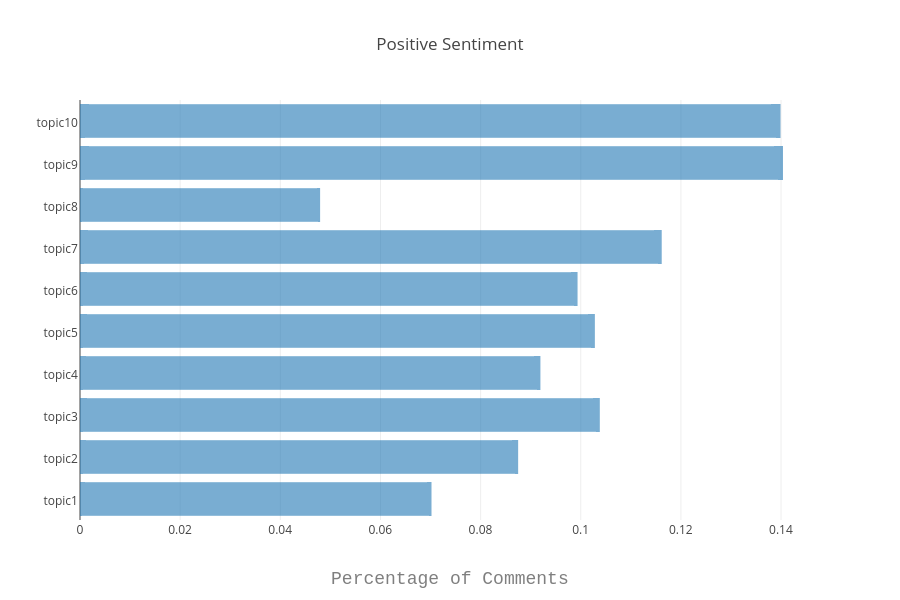

In [66]:
data = Data([
    Bar(
        y=hilary_topics['index'],
        x=hilary_topics['pos_percent'],
        text=hilary_topics['hilary_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_pos')

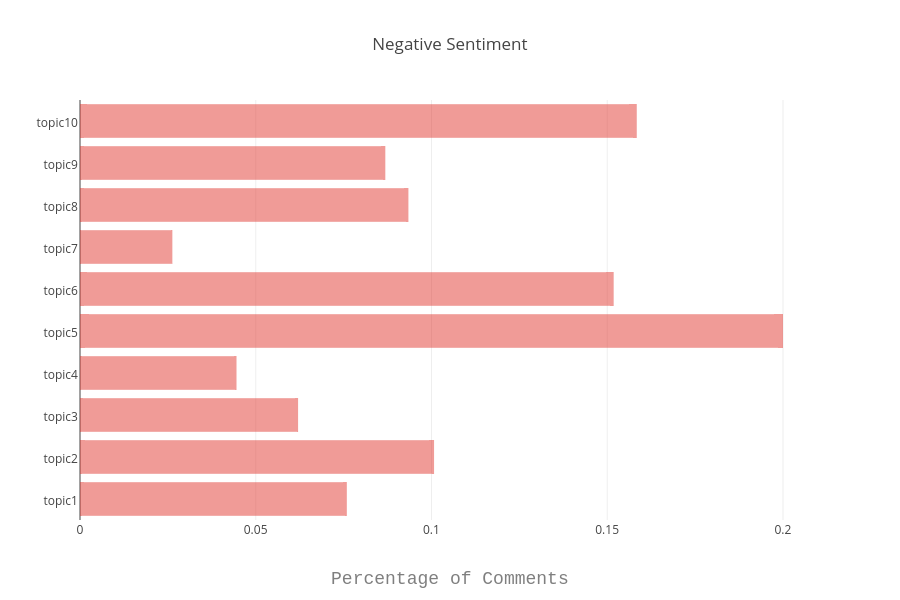

In [68]:
data = Data([
    Bar(
        y=hilary_topics['index'],
        x=hilary_topics['neg_percent'],
        text=hilary_topics['hilary_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_neg')

In [69]:
sanders_com_count = pd.read_csv('data/sanders_com_count.csv')
x = topics[['sanders_pos', 'sanders_neg']].reset_index()
sanders_topics = pd.concat([x, sanders_com_count], axis = 1)
sanders_topics.head()
sanders_topics.drop('Unnamed: 0', axis =1, inplace=True)
sanders_topics['pos_percent'] = sanders_topics['Pos_num']/sanders_topics['Pos_num'].sum()
sanders_topics['pos_percent']
sanders_topics['neg_percent'] = sanders_topics['Neg_num']/sanders_topics['Neg_num'].sum()
sanders_topics['neg_percent']

sanders_topics['sanders_pos_ex1'] = sanders_topics['sanders_pos_ex'].apply(lambda x: add_newline(x))
sanders_topics['sanders_neg_ex1'] = sanders_topics['sanders_neg_ex'].apply(lambda x: add_newline(x))
sanders_topics.to_csv('data/sanders_topics.csv')

In [73]:
print sanders_topics['sanders_pos'].values
print sanders_topics['sanders_neg'].values

[ 'vote primary ll election general bernie hope republican democratic voting'
 'love bernie sanders fight stands good believes agree 59 leader'
 'people tax class country american pay middle money social way'
 'win good lose want bernie luck don nomination sale sanders'
 'senator sanders mr good wish agree times america elected speak'
 'hillary clinton left sanders support bush obama republicans warren far'
 'candidate democratic candidates issues party voters republican campaign sanders media'
 'right need left america bernie people wing person puts sanders'
 'like bernie need fresh vermont stand air breath chance know'
 'president sanders running bernie run ticket person democratic socialist make']
['hillary clinton sanders issues just doesn ll good look make'
 'truth say guts reality senators sanders power speak bernie honesty'
 'vote chance getting bernie nomination little know ll got hands'
 'bernie great small just thing politician candidate work political gail'
 'senator acknowl

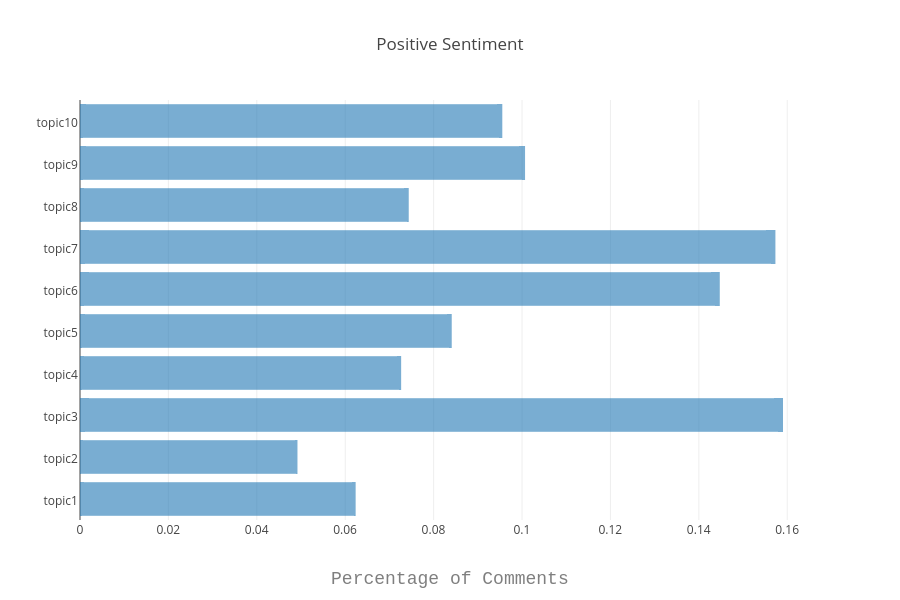

In [71]:
data = Data([
    Bar(
        y=sanders_topics['index'],
        x=sanders_topics['pos_percent'],
        text=sanders_topics['sanders_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_pos')

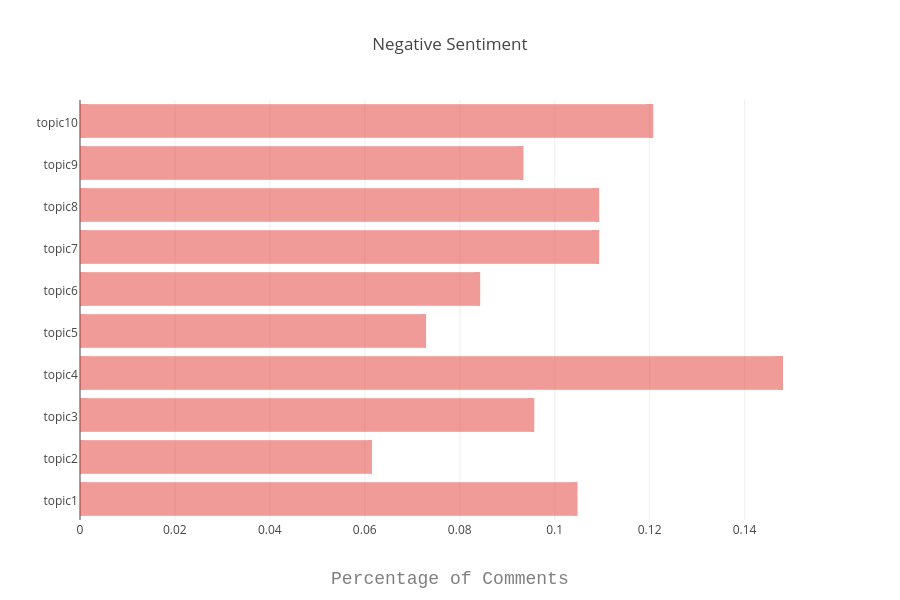

In [74]:
data = Data([
    Bar(
        y=sanders_topics['index'],
        x=sanders_topics['neg_percent'],
        text=sanders_topics['sanders_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_neg')